# Análisis exploratorio de dtos
En este notebook se van a terminar de preparar los datos para poder aplicar los modelos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_intermediate = pd.read_csv("../data/intermediate/df_intermediate.csv")

In [4]:
df_intermediate

,recvTime,idAparcamiento,availableSpotNumber,totalSpotNumber
0,2023-02-03 10:00:00,6,60,372.0
1,2023-02-03 11:00:00,6,48,372.0
2,2023-02-03 12:00:00,6,66,372.0
3,2023-02-03 13:00:00,6,119,372.0
4,2023-02-03 14:00:00,6,155,372.0
...,...,...,...,...
250630,2025-03-05 03:00:00,120,210,431.0
250631,2025-03-05 04:00:00,120,210,431.0
250632,2025-03-05 05:00:00,120,208,431.0
250633,2025-03-05 06:00:00,120,192,431.0


In [ ]:
df_intermediate["recvTime"] = pd.to_datetime(df_intermediate["recvTime"])

In [5]:
fecha_inicio = parking_6["recvTime"].min()
fecha_fin = parking_6["recvTime"].max()
print("FECHA DE INICIO: ", fecha_inicio)
print("FECHA DE FIN: ", fecha_fin)

FECHA DE INICIO:  2023-02-03 10:00:00
FECHA DE FIN:  2025-03-05 07:00:00


In [1]:
set(parking_6["recvTime"])

NameError: name 'parking_6' is not defined

In [15]:
rango_completo = pd.date_range(start=fecha_inicio, end=fecha_fin, freq="h")

# Identificar las fechas que faltan en el DataFrame
fechas_existentes = set(parking_6["recvTime"])
fechas_faltantes = sorted(set(rango_completo) - fechas_existentes)

# Mostrar las fechas faltantes
if fechas_faltantes:
    print(f"🔴 Se encontraron {len(fechas_faltantes)} horas faltantes en la serie temporal.")
else:
    print("✅ No hay valores faltantes en la serie temporal.")


🔴 Se encontraron 267 horas faltantes en la serie temporal.


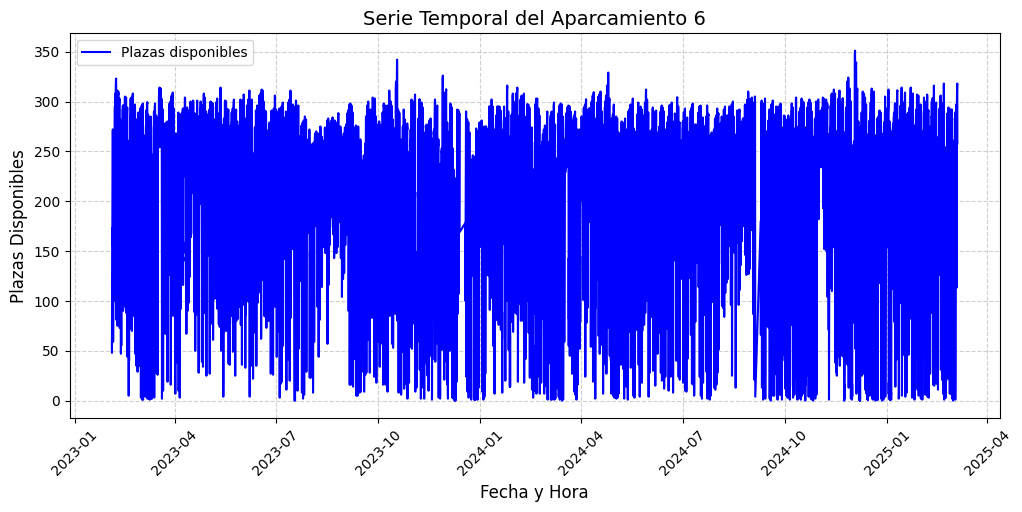

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

def visualizar_serie(df, aparcamiento):
    """
    Genera una gráfica de la serie temporal de disponibilidad de aparcamiento con líneas en lugar de puntos.
    
    Parámetros:
    - df: DataFrame con los datos de los aparcamientos.
    - aparcamiento: ID del aparcamiento a visualizar.
    """
    
    # Filtrar datos del aparcamiento seleccionado
    df_parking = df[df["idAparcamiento"] == aparcamiento].copy()

    # Convertir recvTime a datetime si aún no lo está
    df_parking["recvTime"] = pd.to_datetime(df_parking["recvTime"])
    
    # Ordenar los datos por fecha
    df_parking = df_parking.sort_values("recvTime")

    # Crear la figura
    plt.figure(figsize=(12, 5))
    plt.plot(df_parking["recvTime"], df_parking["availableSpotNumber"], linestyle="-", color="blue", label="Plazas disponibles")

    # Configurar título y etiquetas
    plt.title(f"Serie Temporal del Aparcamiento {aparcamiento}", fontsize=14)
    plt.xlabel("Fecha y Hora", fontsize=12)
    plt.ylabel("Plazas Disponibles", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    
    # Mostrar la gráfica
    plt.show()

# 📊 Llamar a la función con un aparcamiento específico
visualizar_serie(parking_6, 6)  # Cambia el ID del aparcamiento según sea necesario



🔴 Se encontraron 7 huecos consecutivos en la serie temporal:
   grupo              inicio                 fin  duracion_horas
0      0 2023-02-13 22:00:00 2023-02-14 06:00:00               8
1      1 2023-02-14 16:00:00 2023-02-14 16:00:00               1
2      2 2023-11-28 16:00:00 2023-11-29 05:00:00              14
3      3 2023-12-13 09:00:00 2023-12-18 07:00:00             119
4      4 2024-09-04 08:00:00 2024-09-04 09:00:00               2
5      5 2024-09-04 11:00:00 2024-09-09 06:00:00             116
6      6 2025-02-17 08:00:00 2025-02-17 13:00:00               6


/tmp/ipykernel_35565/534534279.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rango_completo = pd.date_range(start=fecha_inicio, end=fecha_fin, freq=frecuencia)


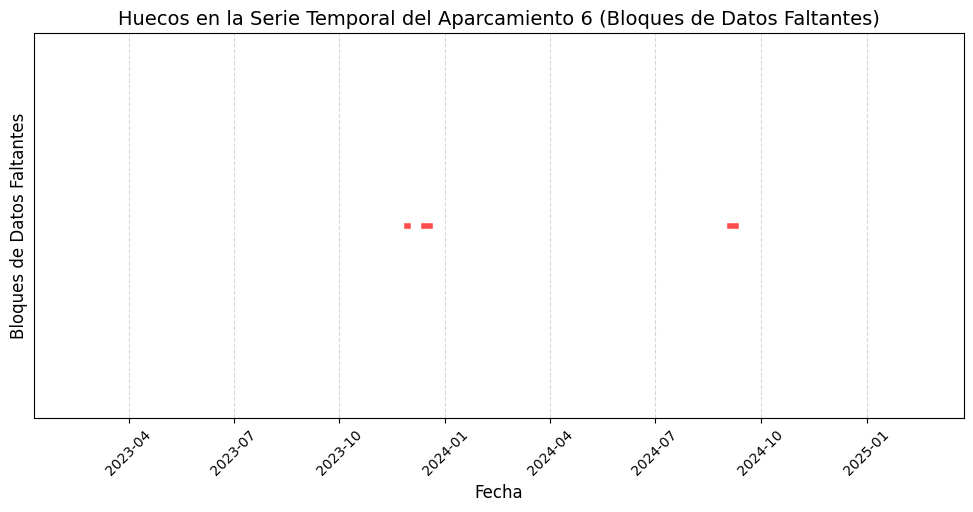

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def detectar_huecos_consecutivos(df, aparcamiento, frecuencia="H"):
    """
    Detecta y visualiza períodos consecutivos donde faltan datos en la serie temporal de un aparcamiento.

    Parámetros:
    - df: DataFrame con los datos de los aparcamientos.
    - aparcamiento: ID del aparcamiento a analizar.
    - frecuencia: Frecuencia esperada en la serie temporal (ejemplo: "H" = cada hora, "D" = cada día).
    """

    # Filtrar datos del aparcamiento seleccionado
    df_parking = df[df["idAparcamiento"] == aparcamiento].copy()
    
    # Convertir recvTime a datetime y establecerlo como índice
    df_parking["recvTime"] = pd.to_datetime(df_parking["recvTime"])
    df_parking = df_parking.sort_values("recvTime").set_index("recvTime")

    # Crear un rango de fechas completo sin huecos
    fecha_inicio = df_parking.index.min()
    fecha_fin = df_parking.index.max()
    rango_completo = pd.date_range(start=fecha_inicio, end=fecha_fin, freq=frecuencia)

    # Identificar las fechas que faltan
    fechas_existentes = set(df_parking.index)
    fechas_faltantes = sorted(set(rango_completo) - fechas_existentes)

    # Si no hay huecos, salir de la función
    if not fechas_faltantes:
        print("✅ No hay huecos en la serie temporal.")
        return
    
    # Convertir la lista de fechas faltantes en un DataFrame
    df_huecos = pd.DataFrame(fechas_faltantes, columns=["recvTime"])
    df_huecos["FaltaDato"] = 1  # Marcador de datos faltantes
    
    # Detectar bloques consecutivos de huecos
    df_huecos["diferencia"] = df_huecos["recvTime"].diff().dt.total_seconds().div(3600)  # Diferencia en horas
    df_huecos["grupo"] = (df_huecos["diferencia"] > 1).cumsum()  # Crear grupos de huecos consecutivos

    # Obtener los períodos de inicio y fin de cada hueco
    df_huecos_agrupados = df_huecos.groupby("grupo").agg(
        inicio=("recvTime", "first"),
        fin=("recvTime", "last"),
        duracion_horas=("diferencia", "count")
    ).reset_index()

    # Mostrar los huecos detectados
    print(f"🔴 Se encontraron {len(df_huecos_agrupados)} huecos consecutivos en la serie temporal:")
    print(df_huecos_agrupados)

    # Graficar los huecos detectados
    plt.figure(figsize=(12, 5))
    for _, row in df_huecos_agrupados.iterrows():
        plt.plot([row["inicio"], row["fin"]], [1, 1], color="red", linewidth=4, alpha=0.7)
    
    # Configurar la gráfica
    plt.title(f"Huecos en la Serie Temporal del Aparcamiento {aparcamiento} (Bloques de Datos Faltantes)", fontsize=14)
    plt.xlabel("Fecha", fontsize=12)
    plt.ylabel("Bloques de Datos Faltantes", fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks([])
    plt.grid(True, linestyle="--", alpha=0.5)
    
    # Mostrar la gráfica
    plt.show()

# 📊 Llamar a la función con un aparcamiento específico
detectar_huecos_consecutivos(parking_6, 6, frecuencia="H")  # "H" para horas, "D" para días
